In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('data.csv')

In [84]:
data.isnull().any().any()


False

In [85]:
len(data.columns)

11

In [86]:
for i in data.columns:
    data[i]=data[i].replace("?",np.nan)
    data[i]=data[i].astype(float)

In [87]:
data.columns

Index(['age', 'sex', 'Chest Pain', 'BP', 'cholestoral', 'fasting blood sugar',
       'Resting ECG', 'Max Hear Rate', 'exercise induced angina', 'oldpeak',
       'object'],
      dtype='object')

In [88]:
#It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

#age: The person's age in years
#sex: The person's sex (1 = male, 0 = female)
#cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#chol: The person's cholesterol measurement in mg/dl
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#thalach: The person's maximum heart rate achieved
#exang: Exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
#ca: The number of major vessels (0-3)
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#target: Heart disease (0 = no, 1 = yes)

In [89]:
data = data.rename(columns={'cp':'Chest Pain' , 'trestbps':'BP','chol':'cholestoral','fbs':'fasting blood sugar','restecg':'Resting ECG','thalach':'Max Hear Rate','exang':'exercise induced angina','thal':'Thalassemia','num       ':'object'})
data

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,object
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0.0
2,29.0,1.0,2.0,140.0,250.0,0.0,0.0,170.0,0.0,0.0,0.0
3,30.0,0.0,1.0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0.0
4,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0.0
5,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0.0
6,32.0,1.0,2.0,110.0,225.0,0.0,0.0,184.0,0.0,0.0,0.0
7,32.0,1.0,2.0,125.0,254.0,0.0,0.0,155.0,0.0,0.0,0.0
8,33.0,1.0,3.0,120.0,298.0,0.0,0.0,185.0,0.0,0.0,0.0
9,34.0,0.0,2.0,130.0,161.0,0.0,0.0,190.0,0.0,0.0,0.0


In [90]:
data.count()

age                        294
sex                        294
Chest Pain                 294
BP                         294
cholestoral                294
fasting blood sugar        294
Resting ECG                294
Max Hear Rate              294
exercise induced angina    294
oldpeak                    294
object                     294
dtype: int64

In [91]:
for i in data.columns:
    if data[i].count() <  200:
        del data[i]
        

In [92]:
data.count()

age                        294
sex                        294
Chest Pain                 294
BP                         294
cholestoral                294
fasting blood sugar        294
Resting ECG                294
Max Hear Rate              294
exercise induced angina    294
oldpeak                    294
object                     294
dtype: int64

In [93]:
data.dtypes

age                        float64
sex                        float64
Chest Pain                 float64
BP                         float64
cholestoral                float64
fasting blood sugar        float64
Resting ECG                float64
Max Hear Rate              float64
exercise induced angina    float64
oldpeak                    float64
object                     float64
dtype: object

In [94]:
data

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,object
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0.0
2,29.0,1.0,2.0,140.0,250.0,0.0,0.0,170.0,0.0,0.0,0.0
3,30.0,0.0,1.0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0.0
4,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0.0
5,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0.0
6,32.0,1.0,2.0,110.0,225.0,0.0,0.0,184.0,0.0,0.0,0.0
7,32.0,1.0,2.0,125.0,254.0,0.0,0.0,155.0,0.0,0.0,0.0
8,33.0,1.0,3.0,120.0,298.0,0.0,0.0,185.0,0.0,0.0,0.0
9,34.0,0.0,2.0,130.0,161.0,0.0,0.0,190.0,0.0,0.0,0.0


In [95]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [96]:
imp_mean.fit(data)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [97]:
data = pd.DataFrame(imp_mean.transform(data), columns=data.columns)

In [98]:
data = data.astype(int)

In [99]:
data

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,object
0,28,1,2,130,132,0,2,185,0,0,0
1,29,1,2,120,243,0,0,160,0,0,0
2,29,1,2,140,250,0,0,170,0,0,0
3,30,0,1,170,237,0,1,170,0,0,0
4,31,0,2,100,219,0,1,150,0,0,0
5,32,0,2,105,198,0,0,165,0,0,0
6,32,1,2,110,225,0,0,184,0,0,0
7,32,1,2,125,254,0,0,155,0,0,0
8,33,1,3,120,298,0,0,185,0,0,0
9,34,0,2,130,161,0,0,190,0,0,0


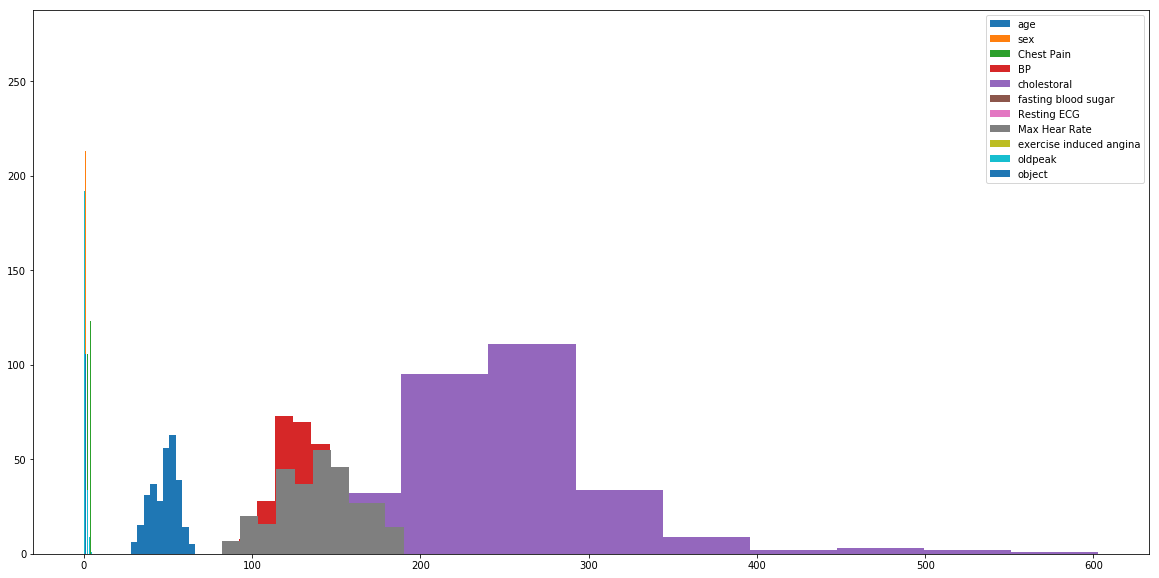

In [100]:
plt.figure(figsize=(20,10))
for i in data.columns:
    plt.hist(data[i] , label=i )
    plt.legend(loc='upper right') 

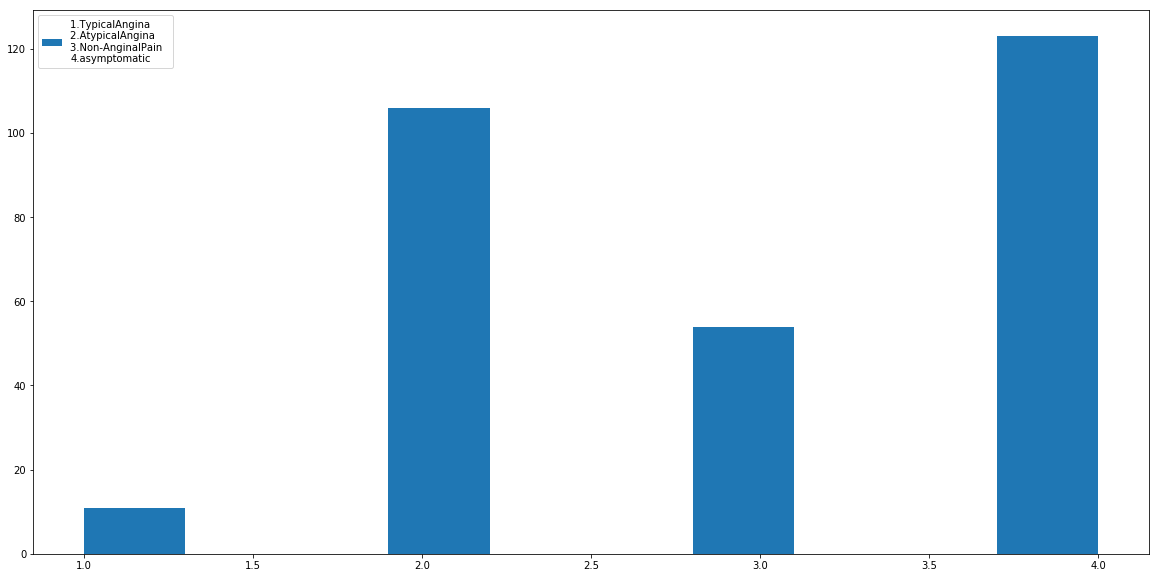

In [101]:
plt.figure(figsize=(20,10))
plt.hist(data["Chest Pain"], label=["1.TypicalAngina \n2.AtypicalAngina  \n3.Non-AnginalPain  \n4.asymptomatic"])
plt.legend(loc='upper left')

([array([  6.,   0.,   0.,  65.,   0.,   0.,  37.,   0.,   0., 105.]),
  array([ 5.,  0.,  0., 41.,  0.,  0., 17.,  0.,  0., 18.])],
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 2 Lists of Patches objects>)

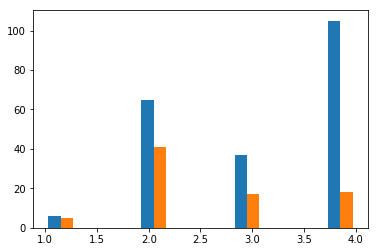

In [102]:
CPmale = data[["Chest Pain"]].where(data["sex"]==1).dropna()
CPfemale = data[["Chest Pain"]].where(data["sex"]==0).dropna()
plt.hist([CPmale["Chest Pain"],CPfemale["Chest Pain"]])


(array([205.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

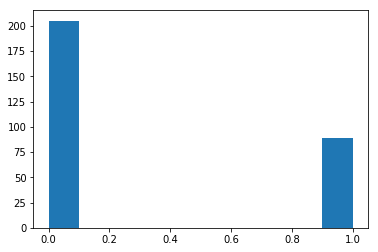

In [103]:
plt.hist(data["exercise induced angina"])

/home/shahir/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shahir/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


([array([ 6., 17., 12., 36., 25., 39., 32., 19., 19.,  8.]),
  array([ 1.,  3.,  4.,  9., 12., 16., 14.,  8.,  8.,  6.])],
 array([ 82. ,  92.8, 103.6, 114.4, 125.2, 136. , 146.8, 157.6, 168.4,
        179.2, 190. ]),
 <a list of 2 Lists of Patches objects>)

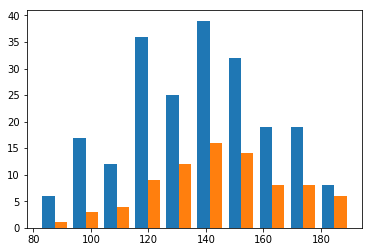

In [104]:
MaleHeartRate = data[["Max Hear Rate"]].where(data["sex"]==1)
FemaleHeartRate = data[["Max Hear Rate"]].where(data["sex"]==0)
plt.hist([MaleHeartRate["Max Hear Rate"],FemaleHeartRate["Max Hear Rate"]])

In [105]:
MaleFrame =( data.where(data.sex==1).dropna())

In [106]:
MaleFrame

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,object
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0.0
2,29.0,1.0,2.0,140.0,250.0,0.0,0.0,170.0,0.0,0.0,0.0
6,32.0,1.0,2.0,110.0,225.0,0.0,0.0,184.0,0.0,0.0,0.0
7,32.0,1.0,2.0,125.0,254.0,0.0,0.0,155.0,0.0,0.0,0.0
8,33.0,1.0,3.0,120.0,298.0,0.0,0.0,185.0,0.0,0.0,0.0
10,34.0,1.0,2.0,150.0,214.0,0.0,1.0,168.0,0.0,0.0,0.0
11,34.0,1.0,2.0,98.0,220.0,0.0,0.0,150.0,0.0,0.0,0.0
14,35.0,1.0,2.0,120.0,308.0,0.0,2.0,180.0,0.0,0.0,0.0
15,35.0,1.0,2.0,150.0,264.0,0.0,0.0,168.0,0.0,0.0,0.0


(array([ 1.,  1.,  6.,  6., 15.,  7., 22.,  9.,  3.,  4.]),
 array([31. , 34.5, 38. , 41.5, 45. , 48.5, 52. , 55.5, 59. , 62.5, 66. ]),
 <a list of 10 Patch objects>)

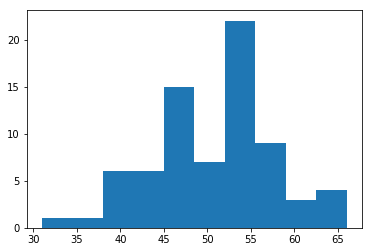

In [107]:
MaleAgeAngina = MaleFrame[["age"]].where(data["exercise induced angina"]==1)
plt.hist(MaleAgeAngina["age"])

(array([ 47.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

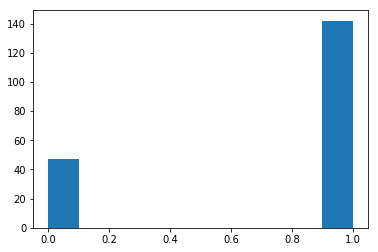

In [108]:
plt.hist(data.where(data.BP > 120)["sex"])

In [109]:
patient = (data.where(data["object"] == 1)).dropna()
MalePatient = (patient.where(patient["sex"]==1)).dropna()
FemalePatient = (patient.where(patient["sex"]==0)).dropna()

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

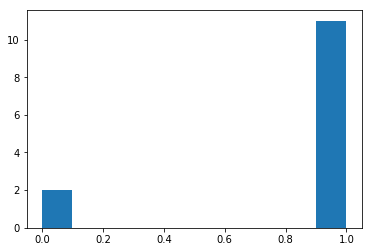

In [110]:
plt.hist(data.where((data["fasting blood sugar"] == 1) & (data["object"] == 1) )["sex"])

# MALE PATIENT

In [111]:
MaleBP_Patient = MalePatient.where(MalePatient.BP >120).dropna()
MaleBP_Patient.BP.count()
print("All men patient having low BP :", (MalePatient.BP.count() - MaleBP_Patient.BP.count()), " and all men patient having high BP :",MaleBP_Patient.BP.count())

All men patient having low BP : 27  and all men patient having high BP : 67


In [112]:
MaleCholestoral_Patient = MalePatient.where(MalePatient.cholestoral >200).dropna()
MaleBP_Patient.cholestoral.count()
print("All men patient having low Cholestoral :", (MalePatient.cholestoral.count() - MaleCholestoral_Patient.cholestoral.count()), " and all men patient having high Cholestoral :",MaleCholestoral_Patient.cholestoral.count())

All men patient having low Cholestoral : 12  and all men patient having high Cholestoral : 82


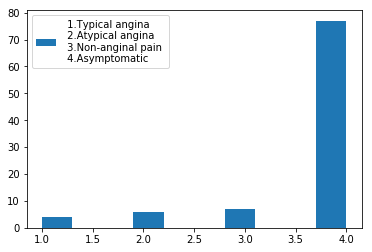

In [113]:
plt.hist(MalePatient['Chest Pain'] , label =" 1.Typical angina \n 2.Atypical angina \n 3.Non-anginal pain \n 4.Asymptomatic ")
plt.legend()

In [114]:
MaleTAngina_Patient = MalePatient.where(MalePatient["Chest Pain"] == 1).dropna()
print("All men patient having no Typical Angina :", (MalePatient.BP.count() - MaleTAngina_Patient["Chest Pain"].count()), " and all men patient having Typical Angina :",MaleTAngina_Patient["Chest Pain"].count())

All men patient having no Typical Angina : 90  and all men patient having Typical Angina : 4


In [115]:
MaleATAngina_Patient = MalePatient.where(MalePatient["Chest Pain"] == 2).dropna()
print("All men patient having no ATypical Angina :", (MalePatient.BP.count() - MaleATAngina_Patient["Chest Pain"].count()), " and all men patient having ATypical Angina :",MaleATAngina_Patient["Chest Pain"].count())

All men patient having no ATypical Angina : 88  and all men patient having ATypical Angina : 6


In [116]:
MaleNAngina_Patient = MalePatient.where(MalePatient["Chest Pain"] == 3).dropna()
print("All men patient having no Non-Angina Pain :", (MalePatient.BP.count() - MaleNAngina_Patient["Chest Pain"].count()), " and all men patient having Non-Angina Pain :",MaleNAngina_Patient["Chest Pain"].count())

All men patient having no Non-Angina Pain : 87  and all men patient having Non-Angina Pain : 7


In [117]:
MaleAsymptomaticPatient = MalePatient.where(MalePatient["Chest Pain"] == 4).dropna()
print("All men patient having no Asymptomatic Pain :", (MalePatient.BP.count() - MaleAsymptomaticPatient["Chest Pain"].count()), " and all men patient having Asymptomatic Pain :",MaleAsymptomaticPatient["Chest Pain"].count())

All men patient having no Asymptomatic Pain : 17  and all men patient having Asymptomatic Pain : 77


In [118]:
MaleFastingBloodSugar = MalePatient.where(MalePatient["fasting blood sugar"] == 1).dropna()
print("All men patient having no fasting blood sugar :", (MalePatient["fasting blood sugar"].count() - MaleFastingBloodSugar["fasting blood sugar"].count()), " and all men patient having fasting blood sugar:",MaleFastingBloodSugar["fasting blood sugar"].count())

All men patient having no fasting blood sugar : 83  and all men patient having fasting blood sugar: 11


# working for Female

In [119]:
FemaleBP_Patient = FemalePatient.where(FemalePatient.BP >120).dropna()
print("All Women patient having low BP :",( (FemalePatient.BP.count() - FemaleBP_Patient.BP.count())), " and all women patient having high BP :",FemaleBP_Patient.BP.count())

All Women patient having low BP : 3  and all women patient having high BP : 9


In [120]:
FemaleBP_Patient = FemalePatient.where(FemalePatient.cholestoral >200).dropna()
print("All Women patient having low Cholestoral :",( (FemalePatient.cholestoral.count() - FemaleBP_Patient.cholestoral.count())), " and all women patient having high Cholestoral :",FemaleBP_Patient.cholestoral.count())

All Women patient having low Cholestoral : 1  and all women patient having high Cholestoral : 11


In [121]:
FemaleTAngina_Patient = FemalePatient.where(FemalePatient["Chest Pain"] == 1).dropna()
print("All Women patient having no Typical Angina :", (FemalePatient["Chest Pain"].count() - FemaleTAngina_Patient["Chest Pain"].count()), " and all Women patient having Typical Angina :",FemaleTAngina_Patient["Chest Pain"].count())

All Women patient having no Typical Angina : 12  and all Women patient having Typical Angina : 0


In [122]:
FemaleATAngina_Patient = FemalePatient.where(FemalePatient["Chest Pain"] == 2).dropna()
print("All Women patient having no ATypical Angina :", (FemalePatient["Chest Pain"].count() - FemaleATAngina_Patient["Chest Pain"].count()), " and all Women patient having ATypical Angina :",FemaleATAngina_Patient["Chest Pain"].count())

All Women patient having no ATypical Angina : 10  and all Women patient having ATypical Angina : 2


In [123]:
FemaleATAngina_Patient = FemalePatient.where(FemalePatient["Chest Pain"] == 3).dropna()
print("All Women patient having Non-Angina Pain :", (FemalePatient["Chest Pain"].count() - FemaleATAngina_Patient["Chest Pain"].count()), " and all Women patient having ATypical Angina :",FemaleATAngina_Patient["Chest Pain"].count())

All Women patient having Non-Angina Pain : 8  and all Women patient having ATypical Angina : 4


In [124]:
FemaleAsymptomaticPatient = FemalePatient.where(MalePatient["Chest Pain"] == 4).dropna()
print("All men patient having no Asymptomatic Pain :", (MalePatient.BP.count() - MaleAsymptomaticPatient["Chest Pain"].count()), " and all men patient having Asymptomatic Pain :",MaleAsymptomaticPatient["Chest Pain"].count())

All men patient having no Asymptomatic Pain : 17  and all men patient having Asymptomatic Pain : 77


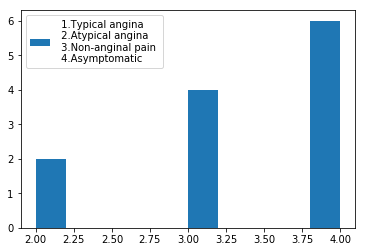

In [125]:
plt.hist(FemalePatient['Chest Pain'] , label =" 1.Typical angina \n 2.Atypical angina \n 3.Non-anginal pain \n 4.Asymptomatic ")
plt.legend()

# Applying Models

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, datasets
from sklearn.model_selection import KFold

In [127]:
X = data.drop('object', axis=1)
X.head()
X.index

RangeIndex(start=0, stop=294, step=1)

In [128]:
y = data.object
y.head()

0    0
1    0
2    0
3    0
4    0
Name: object, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train),len(y_train)
print(X_test.iloc[6,:])

age                         36
sex                          1
Chest Pain                   3
BP                         150
cholestoral                160
fasting blood sugar          0
Resting ECG                  0
Max Hear Rate              172
exercise induced angina      0
oldpeak                      0
Name: 19, dtype: int64


In [130]:
clf = GaussianNB().fit(X_train,y_train)

In [131]:
predicted = clf.predict(X_test)

In [132]:
acc=sum(predicted==y_test)/len(y_test)*100
print(acc)

81.35593220338984


In [133]:
neigh = KNeighborsClassifier(n_neighbors=13 )
neigh.fit(X_train, y_train)
KNNpredicted = neigh.predict(X_test)
acc=sum(KNNpredicted==y_test)/len(y_test)*100
print(acc)

67.79661016949152


In [134]:
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
pred_target=svc.predict(X_test)
acc=sum(pred_target==y_test)/len(y_test)*100
print(acc)


77.96610169491525


In [135]:
predicted = {}
key =0
predicted[1]=[]
predicted[2]=[]
predicted[3]=[]
kfold = KFold(3,True,1)
for train, test in kfold.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y[train], y[test]
    for k in range(1,20,2):    
        neigh = KNeighborsClassifier(n_neighbors=k )
        neigh.fit(X_train, y_train)
        KNNpredicted = neigh.predict(X_test)
        acc=sum(KNNpredicted==y_test)/len(y_test)*100
        key = key+1 if k==1 else key
        predicted[key].append(  acc )

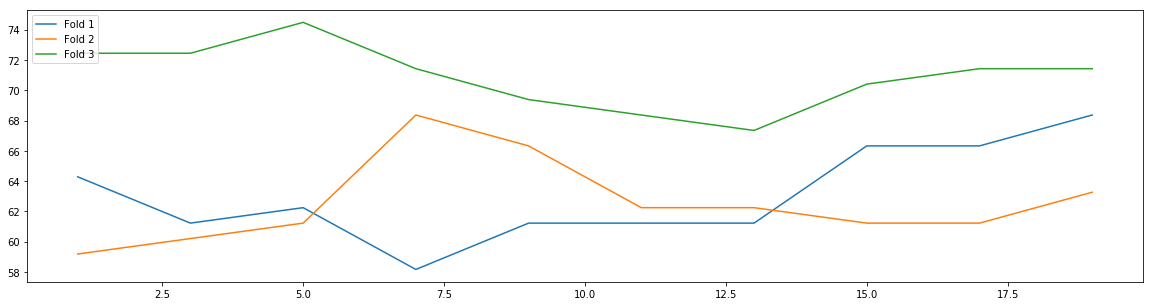

In [136]:
X = list(range(1,20,2))
plt.figure(figsize=(20,5))
plt.plot(X,predicted[1],label ="Fold 1")
plt.plot(X,predicted[2],label ="Fold 2")
plt.plot(X,predicted[3],label ="Fold 3")
plt.legend(loc="upper left")